# TAREA:


# Regresion Lineal
## Basado en Christensen, L y W. Greene (1976), "Economies of Scale in U.S. Electric Power Generation", Journal of Political Economy, Vol. 84, No. 4, pp. 655-676

A continuación, resuleva cada una las instrucciones que se le señalan

In [ ]:
# Importamos Dependencias o Bibliotecas necesarias:
!pip install pyreadstat
import pyreadstat # librería para leer formato ".dta"
import pandas as pd # librería para manipulación de datos
import numpy as np # Librería para operaciones matemáticas
import matplotlib # Librería para graficar
from matplotlib import pyplot as plt # Librería para graficar
import statsmodels.api as sm # Librería para análisis estadístico
from IPython.display import Image # Librería para importar imagénes
from statsmodels.formula.api import ols # Librería para pruebas de hipotesis

#
import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 24.2 MB/s eta 0:00:00


### La base de datos contiene información de 100 empresa de generación eléctrica, reportada en las siguientes variables:

* **firmid:** ID de la empresa
* **cost:** Total costs in MM USD
* **output:** output billion KwH
* **plabor:** price of labor
* **pfuel:** price of fuel
* **pkap:** price of capital
* **labshr:** participación del trabajo en el costo
* **kapshr:** participación del capital en el costo

## 1. Importe la base de DATOS:

In [ ]:
# Ruta al archivo:
dtafile = 'cgreene76.dta'
# La función read_dat devuelve dos objetos: el dataframe y los metadatosdataframe, meta = pyreadstat.read_dta(dtafile)
df, meta = pyreadstat.read_dta(dtafile)
print(df.head())

   firmid   costs  output       plabor       pkap      pfuel  labshr  kapshr
0     1.0  0.2130     8.0  6869.470215  64.945000  18.000000  0.3291  0.4197
1    20.0  0.4887    14.0  5438.890137  86.110001  34.150002  0.2994  0.4571
2    17.0  0.6159    50.0  9204.240234  90.470001  32.070000  0.2963  0.0981
3    14.0  0.7606    65.0  8971.889648  41.243000  28.539000  0.2802  0.1282
4    28.0  0.6363    67.0  6696.500000  58.257999  25.400000  0.2447  0.3674


In [ ]:
# Muestre los datos importados
df.tail(10)
print(df.tail(10))

    firmid       costs   output       plabor       pkap      pfuel  labshr  \
89   127.0  111.867996  23217.0  6873.729980  83.879997  33.394402  0.0849   
90   142.0  125.335999  24001.0  8047.350098  74.372002  33.093201  0.0998   
91   137.0  183.231995  27118.0  9914.360352  78.480003  41.757801  0.1280   
92   130.0   87.101501  27708.0  6378.229980  63.599998  20.299999  0.1060   
93   144.0  240.514008  29613.0  9312.929688  81.750000  41.887199  0.1561   
94   143.0  191.563004  30958.0  9810.099609  69.541000  36.307598  0.1636   
95   141.0  168.378006  34212.0  5683.830078  80.385002  40.528599  0.0651   
96   138.0  169.235001  38343.0  9117.160156  65.991997  31.589701  0.0663   
97   175.0  269.773010  46870.0  9761.379883  69.541000  33.199902  0.1594   
98   172.0  240.485992  53918.0  6068.870117  78.379997  31.195400  0.0966   

    kapshr  
89  0.2007  
90  0.2457  
91  0.2265  
92  0.2257  
93  0.2017  
94  0.1524  
95  0.1361  
96  0.2192  
97  0.2194  
98  0.1846 

In [ ]:
print(df.columns)

Index(['firmid', 'costs', 'output', 'plabor', 'pkap', 'pfuel', 'labshr',
       'kapshr'],
      dtype='object')


# Considere una función de costos del tipo translog, escrita como:

$$ln(C) = \alpha_0 +  \alpha_Y ln(Y) + \frac{1}{2} \gamma_{YY} (ln(Y))^2 + \sum_k \alpha_k ln(P_{k}) + \frac{1}{2} \sum_{k} \sum_{j} \gamma_{kj} ln(P_k) ln(P_j) + \sum_k \gamma_{Yk} ln(Y) ln(P_k) + \varepsilon_i$$

Este ecuación es equivalente a la que Christensen y Greene denominan Modelo A. Donde:
$\gamma_{kj} = \gamma_{jk}$, $C$ es el costo total, $Y$ es el producto, $P_k$'s y $P_j$'s son los precios de los factores. $k,j = $ precio de combustible, precio del capital y precio del trabajo.

Noten que la doble suma $\sum_{k} \sum_{j} \gamma_{kj} ln(P_k) ln(P_j)$ implica que el caso $(ln(P_k))^2$ y $(ln(P_j))^2$ son posibles.

## 2. Realice las transformaciones necesarias en los datos para estimar la ecuación anterior:

In [ ]:
df['One'] = 1

In [ ]:
#Creamos la variable:
df['Ltotcost'] = np.log(df['costs'])  # Log del costo total
df['Loutput'] = np.log(df['output'])  # Log del producto
df['Lpfuel'] = np.log(df['pfuel'])  # Log del precio del combustible
df['Lpkap'] = np.log(df['pkap'])  # Log del precio del capital
df['Lplabor'] = np.log(df['plabor'])  # Log del precio del trabajo
df['Llabshr'] = np.log(df['labshr'])  # Log de la participación del trabajo en el costo
df['Lkapshr'] = np.log(df['kapshr'])  # Log de la participación del capital en el costo

df['One'] = 1


In [ ]:
# Muestre su data frame con las variables adicionales necesarias
# variables adicionales necesarias:
df['Loutput_sq'] = df['Loutput']**2
df['Lpfuel_sq'] = df['Lpfuel']**2
df['Lpkap_sq'] = df['Lpkap']**2
df['Lplabor_sq'] = df['Lplabor']**2
df['Loutput_Lpfuel'] = df['Loutput'] * df['Lpfuel']
df['Loutput_Lpkap'] = df['Loutput'] * df['Lpkap']
df['Loutput_Lplabor'] = df['Loutput'] * df['Lplabor']
df['Lpfuel_Lpkap'] = df['Lpfuel'] * df['Lpkap']
df['Lpfuel_Lplabor'] = df['Lpfuel'] * df['Lplabor']
df['Lpkap_Lplabor'] = df['Lpkap'] * df['Lplabor']

# DataFrame con las nuevas columnas:
df[['Ltotcost', 'Loutput', 'Lpfuel', 'Lpkap', 'Lplabor',
    'Loutput_sq', 'Lpfuel_sq', 'Lpkap_sq', 'Lplabor_sq',
    'Loutput_Lpfuel', 'Loutput_Lpkap', 'Loutput_Lplabor',
    'Lpfuel_Lpkap', 'Lpfuel_Lplabor', 'Lpkap_Lplabor']].head()

,Ltotcost,Loutput,Lpfuel,Lpkap,Lplabor,Loutput_sq,Lpfuel_sq,Lpkap_sq,Lplabor_sq,Loutput_Lpfuel,Loutput_Lpkap,Loutput_Lplabor,Lpfuel_Lpkap,Lpfuel_Lplabor,Lpkap_Lplabor
0,-1.546463,2.079442,2.890372,4.173541,8.834842,4.324077,8.354249,17.418442,78.054438,6.010359,8.678634,18.371538,12.063084,25.535979,36.872574
1,-0.716006,2.639057,3.530763,4.455626,8.601330,6.964624,12.466285,19.852599,73.982883,9.317885,11.758651,22.699404,15.731756,30.369256,38.324307
2,-0.484671,3.912023,3.467921,4.505018,9.127420,15.303924,12.026476,20.295190,83.309788,13.566587,17.623735,35.706675,15.623048,31.653170,41.119192
3,-0.273648,4.174387,3.351272,3.719481,9.101852,17.425509,11.231021,13.834542,82.843702,13.989505,15.526556,37.994653,12.464992,30.502776,33.854168
4,-0.452085,4.204693,3.234749,4.064881,8.809340,17.679440,10.463602,16.523261,77.604476,13.601126,17.091577,37.040568,13.148872,28.496006,35.808924


## 3. Realice la estimación de la regresión de la función translog:

In [ ]:
# Definición de vector y matriz: Y y X
Y = df[['Ltotcost']]

# Definir la matriz de variables independientes
df['One'] = 1
X = df[['One', 'Loutput', 'Lplabor', 'Lpfuel', 'Lpkap',
        'Loutput_sq', 'Lplabor_sq', 'Lpfuel_sq', 'Lpkap_sq',
        'Loutput_Lpfuel', 'Loutput_Lpkap', 'Loutput_Lplabor',
        'Lpfuel_Lpkap', 'Lpfuel_Lplabor', 'Lpkap_Lplabor']]

# Verificar la matriz X
X.head()

,One,Loutput,Lplabor,Lpfuel,Lpkap,Loutput_sq,Lplabor_sq,Lpfuel_sq,Lpkap_sq,Loutput_Lpfuel,Loutput_Lpkap,Loutput_Lplabor,Lpfuel_Lpkap,Lpfuel_Lplabor,Lpkap_Lplabor
0,1,2.079442,8.834842,2.890372,4.173541,4.324077,78.054438,8.354249,17.418442,6.010359,8.678634,18.371538,12.063084,25.535979,36.872574
1,1,2.639057,8.601330,3.530763,4.455626,6.964624,73.982883,12.466285,19.852599,9.317885,11.758651,22.699404,15.731756,30.369256,38.324307
2,1,3.912023,9.127420,3.467921,4.505018,15.303924,83.309788,12.026476,20.295190,13.566587,17.623735,35.706675,15.623048,31.653170,41.119192
3,1,4.174387,9.101852,3.351272,3.719481,17.425509,82.843702,11.231021,13.834542,13.989505,15.526556,37.994653,12.464992,30.502776,33.854168
4,1,4.204693,8.809340,3.234749,4.064881,17.679440,77.604476,10.463602,16.523261,13.601126,17.091577,37.040568,13.148872,28.496006,35.808924


In [ ]:
# Resporte de la estimación:
est = sm.OLS(Y,X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               Ltotcost   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     819.2
Date:                Sat, 29 Mar 2025   Prob (F-statistic):           1.81e-83
Time:                        07:22:30   Log-Likelihood:                 66.215
No. Observations:                  99   AIC:                            -102.4
Df Residuals:                      84   BIC:                            -63.50
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
One               -82.7169     56.190     

## 4. Pruebe cada una de las siguientes hipótesis

En cada caso escriba sus conclusiones respecto a la prueba y qué significado tiene para la estimación, de acuerdo con el trabajo de Christensen y Greene (1976)

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Establecemos la fórmula de la ecuación estimada correctamente
formula = 'Ltotcost ~ One + Loutput + Lplabor + Lpfuel + Lpkap + \
           Loutput_sq + Lplabor_sq + Lpfuel_sq + Lpkap_sq + \
           Loutput_Lpfuel + Loutput_Lpkap + Loutput_Lplabor + \
           Lpfuel_Lpkap + Lpfuel_Lplabor + Lpkap_Lplabor'

# Ajustamos el modelo usando la fórmula
results = smf.ols(formula, data=df).fit()

# Mostramos el resumen del modelo
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:               Ltotcost   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     819.2
Date:                Sat, 29 Mar 2025   Prob (F-statistic):           1.81e-83
Time:                        07:22:33   Log-Likelihood:                 66.215
No. Observations:                  99   AIC:                            -102.4
Df Residuals:                      84   BIC:                            -63.50
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -41.3585     28.095     

### 4.1
$$H_0: \sum_k \alpha_k = 1$$

In [ ]:
# Definir la restricción lineal: α_plabor + α_pfuel + α_pkap = 1
restriction = 'Lplabor + Lpfuel + Lpkap = 1'

# Aplicar el test de Wald
wald_test = results.wald_test(restriction)

print(wald_test)


<F test: F=array([[2.11309194]]), p=0.14977001510743282, df_denom=84, df_num=1>


In [ ]:
# Prueba de la hipótesis:
hypotheses_1 = 'Lplabor + Lpfuel + Lpkap = 1'
t_test_1 = results.t_test(hypotheses_1)
print(t_test_1)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            23.2943     15.337      1.454      0.150      -7.205      53.793


En la Hipotesis 4.1 dado que el p-value 0.1497 es mayor que 0.05, no se rechaza la hipótesis nula al 5% de significancia. Lo que muestra que no hay suficiente evidencia estadística para afirmar que la función de costos no es homogénea de grado uno.

Según Christensen y Greene (1976),  la homogeneidad de grado uno en los precios de los insumos es una propiedad fundamental en muchas funciones de costos, esto por que asegura que los costos responden de manera proporcional a a cambios en todos los precios de los insumos.

No se rechaza la hipótesis nula, lo que significa que la restricción $$H_0: \sum_k \alpha_k = 1$$ no es incompatible con los datos.

### 4.2
$$H_0: \sum_k \gamma_{Yk} = 0$$

In [ ]:
# Establecemos la hipótesis
hypotheses_2 = 'Loutput_Lpfuel + Loutput_Lpkap + Loutput_Lplabor = 0'

# Realizar la prueba de Wald
wald_test_result = results.wald_test(hypotheses_2)

# Mostrar el resultado de la prueba
print(wald_test_result)

<F test: F=array([[1.32517912]]), p=0.25293090994119916, df_denom=84, df_num=1>


In [ ]:
# Prueba de la hipótesis:
t_test_2 = results.t_test(hypotheses_2)
print(t_test_2)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0935      0.081      1.151      0.253      -0.068       0.255


En la Hipotesis 4.2 se evalua si el costo total responde de manera separable a la producción y los precios de los insumos. En pocas palabras muestra si el efecto conjunto de la producción y los precios de los insumos en el costo total es insignificante. En este caso el p-value es 0.253, no se rechaza la hipótesis nula al 5% de significancia. Mostrando que no hay suficiente evidencia estadistica para decir que  la interacción entre el producto y los precios de los insumos afecta significativamente el costo total. Para Christensen y Greene, la función de costos translog permite la flexibilidad de los coeficientes de interacción, principalmente para capturar efectos cruzados entre la producción y los precios de los insumos. Pero si estos terminos no son significativos, puede indicar que La función de costos podría simplificarse eliminando estos términos de interacción y que el costo total puede depender de manera separada de de los precios de los insumos y del producto, sugiriendo que la evidncia para argumentar la exisitencia de complementariedad o sustitución entre la producción y los insumos en la función de costos estimada no es fuerte.

### 4.3
$$H_0: \sum_{k} \gamma_{kj} = \sum_{j} \gamma_{kj} = \sum_{k} \sum_{j} \gamma_{kj} = 0$$

In [ ]:
# Establecemos la hipótesis
hypothesis_3 = 'Lpfuel_sq + Lpkap_sq + Lplabor_sq + Lpfuel_Lpkap + Lpfuel_Lplabor + Lpkap_Lplabor = 0'
wald_test_result = results.wald_test(hypothesis_3)
print(wald_test_result)

<F test: F=array([[1.78298481]]), p=0.18539052696968522, df_denom=84, df_num=1>


In [ ]:
# Prueba de la hipótesis:
t_test_3 = results.t_test(hypothesis_3)
print(t_test_3)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -1.4666      1.098     -1.335      0.185      -3.651       0.718


En la hipotesis 4.3 el p-valor es 0.185, es mayor que 0.05, no se rechaza la hipótesis, no hay suficiente evidencia estadística para afirmar que las interacciones entre los precios de los insumos afectan significativamente el costo total. Para Christensen y Greene, en una función de costos translog, la interaccion que hay entre los precios de los insumos permite modelar efectos de complementariedad o sustitución entre estos insumos, pero si los coeficientes no son signiicativos sugiere que Los precios de los insumos afectan el costo total de forma independiente, sin interacciones significativas entre ellos.

## 5. Dadas sus conclusiones en las pruebas de hipótesis anteriores, ¿considere si debe ajustar la función de costos del tipo translog descrita anteriormente?, en su caso ajuste la siguiente expresión a la forma que debería estimar:

$$ln(C) = \alpha_0 +  \alpha_Y ln(Y) + \frac{1}{2} \gamma_{YY} (ln(Y))^2 + \sum_k \alpha_k ln(P_{k}) + \frac{1}{2} \sum_k \sum_j \gamma_{kj} ln(P_k) ln(P_j) + \sum_k \gamma_{Yk} ln(Y) ln(P_k) + \varepsilon_i$$

## Estime la nueva propuesta

In [ ]:
# Definición de vector y matriz: Y y X


Y = ["Ltotcost"]
X = ["One", "Loutput", "Lplabor", "Lpfuel", "Lpkap", "Loutput_sq",
     "Loutput_Lpfuel", "Loutput_Lpkap", "Loutput_Lplabor"]

formula_simplificada = 'Ltotcost ~ One + Loutput + Lplabor + Lpfuel + Lpkap + \
                        Loutput_sq + Loutput_Lpfuel + Loutput_Lpkap + Loutput_Lplabor'

# Ajustar el modelo
results_simplificado = smf.ols(formula=formula_simplificada, data=df).fit()

# resumen
print(results_simplificado.summary())

                            OLS Regression Results                            
Dep. Variable:               Ltotcost   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     1427.
Date:                Sat, 29 Mar 2025   Prob (F-statistic):           2.65e-91
Time:                        07:22:52   Log-Likelihood:                 62.611
No. Observations:                  99   AIC:                            -107.2
Df Residuals:                      90   BIC:                            -83.87
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.3253      2.177     

In [ ]:
# Resporte de la estimación:
# Definir la variable dependiente (Y) y las independientes (X)
Y = df["Ltotcost"]  # Ahora Y es una serie numérica
X = df[["One", "Loutput", "Lplabor", "Lpfuel", "Lpkap", "Loutput_sq",
        "Loutput_Lpfuel", "Loutput_Lpkap", "Loutput_Lplabor"]]  # X es un DataFrame


X = sm.add_constant(X)

est = sm.OLS(Y, X)
est2 = est.fit()

# Mostrar el resumen del modelo
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:               Ltotcost   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     1427.
Date:                Sat, 29 Mar 2025   Prob (F-statistic):           2.65e-91
Time:                        07:25:09   Log-Likelihood:                 62.611
No. Observations:                  99   AIC:                            -107.2
Df Residuals:                      90   BIC:                            -83.87
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
One                -0.6506      4.354     

In [ ]:
#Nueva Funcion de costos
import statsmodels.api as sm

# Definir las nuevas variables a incluir en el modelo ajustado
X_new = df[["One", "Loutput", "Lplabor", "Lpfuel", "Lpkap", "Loutput_sq", "Loutput_Lpfuel"]]

# Agregar constante
X_new = sm.add_constant(X_new)

# Variable dependiente
Y = df["Ltotcost"]

# Estimación del nuevo modelo
model_new = sm.OLS(Y, X_new)
results_new = model_new.fit()

# Mostrar resumen
print(results_new.summary())


                            OLS Regression Results                            
Dep. Variable:               Ltotcost   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     1850.
Date:                Sat, 29 Mar 2025   Prob (F-statistic):           1.34e-93
Time:                        07:29:50   Log-Likelihood:                 60.151
No. Observations:                  99   AIC:                            -106.3
Df Residuals:                      92   BIC:                            -88.14
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
One               -5.6483      1.378     -4.

Ahora con los ajustes realizados, los resultados de la estimación de la nueva función de costos translog ajustada, muestran una R2=0.992 y R2 ajustado=0.991, mostrando que la apacidad explicativa del modelo sigue siendo muy alta, El F-statistic de 1850 con un p-value de 1.34e-93 puede confirmar que el modelo en su conjunto es altamente significativo. AIC y BIC mejoraron respecto al modelo anterior.

Loutput_sq sigue siendo significativo ,Loutput no es estadísticamente significativo, Lpfuel y Lpkap tampoco son significativos, con p-valores altos.Lplabor es altamente significativo y Loutput_Lpfuel está en el límite de la significancia. en general se eliminaron terminos inecesarios lo que redujo la la multicolinealidad y mejorado la estabilidad del modelo.

la prueba Durbin-Watson da 1.793, lo que indica que no hay un problema  de autocorrelación en los residuos.

## 6. Determine el valor del Costo Total Estimado y el Costo Medio Estimado considerado cualquiera de las estimaciones que considere pertinente

In [ ]:
# Recuperamos de la regresión el valor del log del costo estimado
df['Ltotcost_est'] = est2.predict(X)

# Anti-log para obtener el costo total estimado
df['totcost_e'] = np.exp(df['Ltotcost_est'])

# Costo medio estimado
df['avgcost_e'] = df['totcost_e'] / df['output']

# Vemos los resultados
df[['Ltotcost_est', 'totcost_e', 'avgcost_e']].head()


,Ltotcost_est,totcost_e,avgcost_e
0,-1.521668,0.218347,0.027293
1,-0.965221,0.380899,0.027207
2,-0.305755,0.736567,0.014731
3,-0.315792,0.729211,0.011219
4,-0.264500,0.767590,0.011457


Podemos observar que Los costos estimados son relativamente bajos para estas observaciones, El costo medio estimado tiende a disminuir de la primera a la última observación listada, esto es indicativo de economías de escala en ese rango. En pocas palabras el modelo predice un costo total y un costo medio coherentes con la posibilidad de economías de escala.

## 7. Gráfique su estimación de Costo Medio y el Costo Medio observado

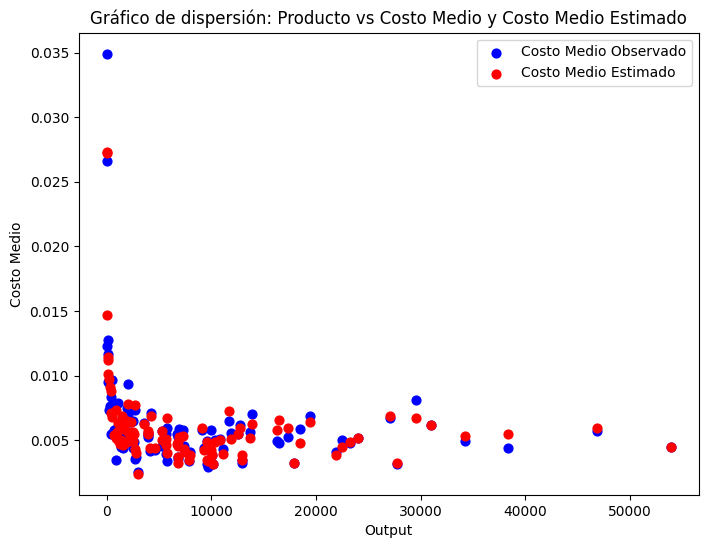

In [ ]:
# graficamos resultados:
import matplotlib.pyplot as plt

# Si no tienes el costo medio observado calculado, lo definimos:
# Suponiendo que la columna 'costs' tiene el costo total observado
df['avgcost'] = df['costs'] / df['output']

# Creamos la figura
plt.figure(figsize=(8,6))

# Graficamos el costo medio observado (por ejemplo, en azul)
plt.scatter(df['output'], df['avgcost'], s=40, color="blue", label="Costo Medio Observado")

# Graficamos el costo medio estimado (por ejemplo, en rojo)
plt.scatter(df['output'], df['avgcost_e'], s=40, color="red", label="Costo Medio Estimado")

# Añadimos título y etiquetas a los ejes
plt.title("Gráfico de dispersión: Producto vs Costo Medio y Costo Medio Estimado")
plt.xlabel("Output")
plt.ylabel("Costo Medio")

# Mostramos la leyenda
plt.legend()

# Guardamos la imagen en un archivo PNG antes de mostrarla
plt.savefig("grafico_costos.png", dpi=300)

# Mostramos el gráfico
plt.show()


La grafica se puede observar que A medida que el output aumenta, el costo medio disminuye rápidamente al inicio y luego se estabiliza, lo que sugiere economías de escala.

## 8. Guarde el Data Frame en un archivo CSV:

In [ ]:
# Guardar el DataFrame 'df' en un archivo CSV
df.to_csv("dataframe_guardado.csv", index=False)
